<a href="https://colab.research.google.com/github/BorisLoveDev/don-t_know-s_agents/blob/main/augmentator_by_V_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 [==============================] - 0s 0us/step


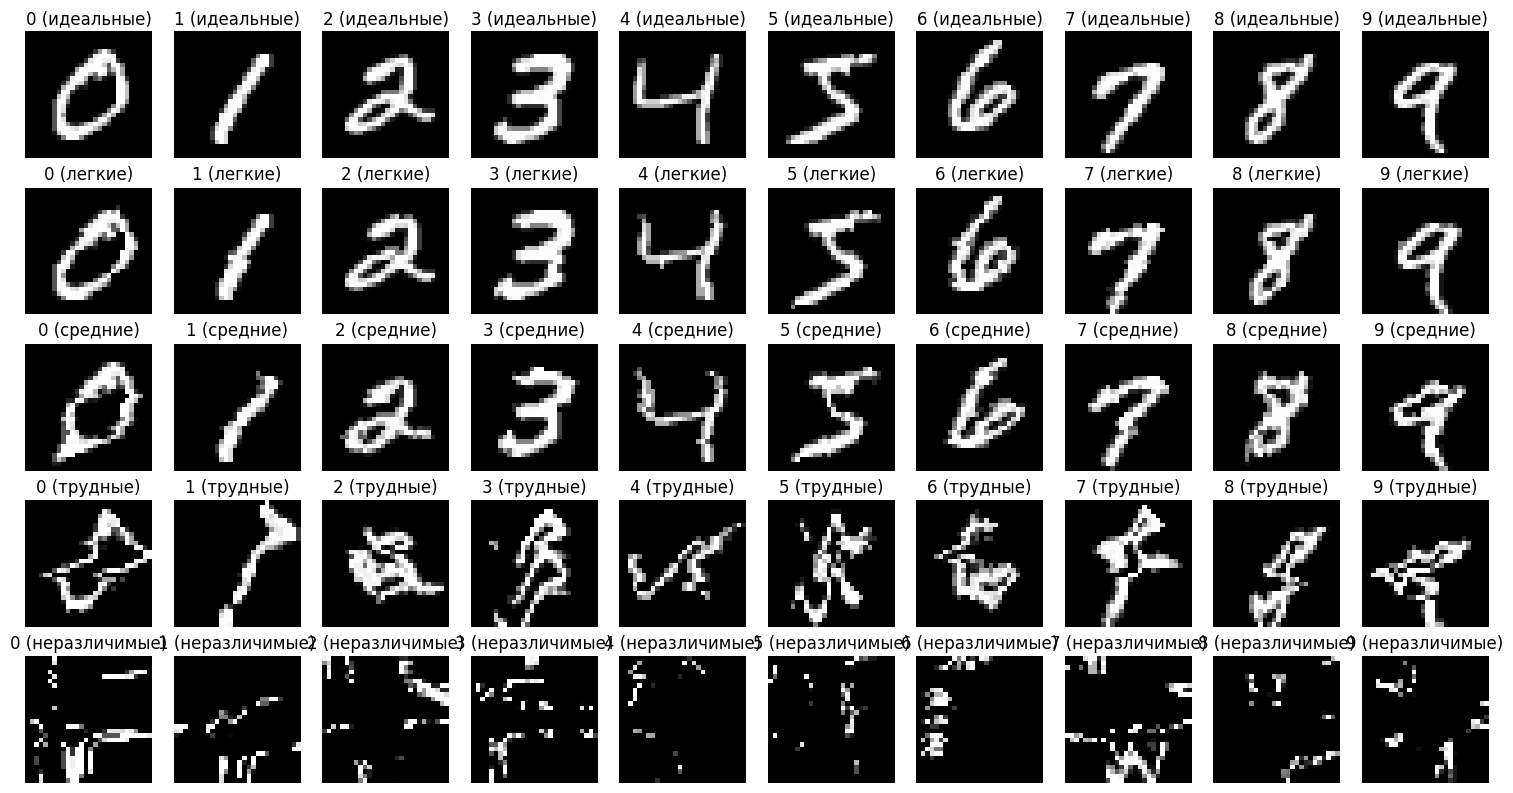

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Загрузка данных MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Функция для деформации изображения
def deform_image(image, A, B, M=100, NP=5):
    C = M / (NP + 1.0)
    SS = np.zeros((M, M))
    XN, YN, DX, DY = np.zeros(M), np.zeros(M), np.linspace(0, M-1, M), np.linspace(0, M-1, M)

    # Вычисление деформирующих векторов
    for j in range(NP):
        TXN = (j + 0.5 - np.random.random()) * C
        TYN = (j + 0.5 - np.random.random()) * C
        TDX = (j + 0.5 - np.random.random()) * C
        TDY = (j + 0.5 - np.random.random()) * C
        AXN = B * (1.0 - 2.0 * np.random.random())
        AYN = B * (1.0 - 2.0 * np.random.random())
        ADX = A * (1.0 - 2.0 * np.random.random())
        ADY = A * (1.0 - 2.0 * np.random.random())
        PXN = (0.1 + 0.9 * np.random.random()) * C
        PYN = (0.1 + 0.9 * np.random.random()) * C
        PDX = (0.1 + 0.9 * np.random.random()) * C
        PDY = (0.1 + 0.9 * np.random.random()) * C

        DX += ADX * np.exp(-np.square((np.linspace(0, M-1, M) - TDX) / PDX))
        DY += ADY * np.exp(-np.square((np.linspace(0, M-1, M) - TDY) / PDY))
        XN += AXN * np.exp(-np.square((np.linspace(0, M-1, M) - TXN) / PXN))
        YN += AYN * np.exp(-np.square((np.linspace(0, M-1, M) - TYN) / PYN))

    # Применение деформации к изображению
    deformed_image = np.zeros((M, M))
    for j in range(M):
        for i in range(M):
            x_index = int(DX[i] + XN[j])
            y_index = int(DY[j] + YN[i])
            if 0 <= x_index < M and 0 <= y_index < M:
                deformed_image[j, i] = image[y_index, x_index] if y_index < image.shape[0] and x_index < image.shape[1] else 0
    return deformed_image

# Параметры деформации для разных уровней сложности
deform_params = {
    "идеальные": (0, 0),
    "легкие": (0.2, 1.0),
    "средние": (0.4, 2.0),
    "трудные": (0.8, 6.0),
    "неразличимые": (10.0, 30.0)
}

# Генерация и отображение деформированных изображений
plt.figure(figsize=(15, 8))
for i, (label, params) in enumerate(deform_params.items()):
    A, B = params
    for digit in range(10):
        idx = np.where(y_train == digit)[0][0]
        image = x_train[idx]
        deformed_image = deform_image(image, A, B, M=28, NP=5)  # Изменение размера M для соответствия размеру изображения MNIST

        plt.subplot(5, 10, i * 10 + digit + 1)
        plt.imshow(deformed_image, cmap='gray')
        plt.title(f"{digit} ({label})")
        plt.axis('off')

plt.tight_layout()
plt.show()
